# Caso de Negocio A: Sistema de Clasificación para la Aprobación de Préstamos

## Objetivo
Desarrollar y desplegar un modelo de aprendizaje automático para predecir la probabilidad de que los clientes paguen sus préstamos. Esto ayudará a la institución financiera a tomar decisiones informadas y reducir el riesgo de incumplimiento.

## Datos Utilizados
El modelo utilizará el conjunto de datos proporcionado, que incluye información demográfica del cliente (como edad y género), información financiera (sueldos, saldos de cuentas, historial de transacciones), uso de productos bancarios (tenencia de tarjetas, operaciones digitales), y datos de campañas de marketing.

## Análisis Propuesto
1. **Análisis Exploratorio de Datos (EDA):** Comprender las tendencias, patrones y anomalías en los datos.
2. **Limpieza y Preprocesamiento de Datos:** Tratar con valores faltantes, codificar variables categóricas y normalizar/escalar los datos.
3. **Selección y Construcción de Características:** Identificar las variables más relevantes que afectan la probabilidad de aprobación de préstamos.

## Desarrollo del Modelo
1. **Selección de Algoritmos:** Probar varios algoritmos de clasificación (como regresión logística, árboles de decisión, random forest, y máquinas de soporte vectorial) para encontrar el mejor modelo.
3. **Evaluación del Modelo:** Usar métricas como precisión, recall. (matrix)

## Beneficios Esperados
- **Reducción de Riesgos:** Menor probabilidad de incumplimiento de préstamos debido a una mejor evaluación de riesgo.
- **Eficiencia Operativa:** Reducción del tiempo y recursos necesarios para evaluar solicitudes de préstamo.
- **Experiencia del Cliente:** Mejora en la velocidad y transparencia del proceso de solicitud de préstamos.
- **Cumplimiento y Ética:** Asegurar que las decisiones de préstamo se tomen de manera justa y conforme a las regulaciones.

Este proyecto de Machine Learning no solo mejorará la capacidad de la institución financiera para gestionar el riesgo crediticio, sino que también optimizará el proceso de toma de decisiones para la aprobación de préstamos, beneficiando tanto a la institución como a sus clientes.

## Metadata
- mes: Mes de los datos.
- cliente: Identificación del cliente.
- estadoCliente: Estado del cliente.
- rngEdad: Rango de edad.
- genero: Género del cliente.
- rngSueldo: Rango de sueldo.
- procedencia: Procedencia del cliente.
- operDigital: Indicador de operaciones digitales.
- trxDigitalUm: Cantidad de transacciones digitales en el último mes.
- promTrxDig3Um: Promedio de transacciones digitales en los últimos 3 meses.
- recCamp: Recepción de campañas.
- frecCamp: Frecuencia de recepción de campañas.
- tenTarjeta: Tenencia de tarjeta.
- promConsBanco3Um: Promedio de consumo en el banco en los últimos 3 meses.
- promSaldoBanco3Um: Promedio de saldo en el banco en los últimos 3 meses.
- promSaldoTc3Um: Promedio de saldo en tarjetas de crédito en los últimos 3 meses.
- promSaldoPrest3Um: Promedio de saldo de préstamos en los últimos 3 meses.
- sowTcUm: Indicador relacionado con tarjetas de crédito en el último mes.
- sowPrestUm: Indicador relacionado con préstamos en el último mes.
- target:
 - Valor 1: indica que el préstamo sí ha sido aprobado
 - Valor 0: indica que el préstamo ha sido rechazado

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Grupo Room 2


1.   Carlos Enrique Adrianzen Hernández
2.   César Hiben Heredia Fuertes
3.   Víctor Lenin Rodríguez Barboza



In [ ]:
# Import librerias con que vamos a trabajar

# Manipulacion de datos
import pandas as pd

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Separacion
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.preprocessing import StandardScaler

# Seleccion de caracteristicas
from sklearn.feature_selection import SelectKBest, f_classif, SelectPercentile, VarianceThreshold

# Metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#Optimización de hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [ ]:
# Carga dataframe
data = pd.read_csv("/content/sample_data/data_prestamo_correcta.csv")

In [ ]:
df=data.sample(n=20000,random_state=42)

# EDA

In [ ]:
# Visualizar columnas y filas
df.head(5)

,mes,cliente,estadoCliente,rngEdad,genero,rngSueldo,procedencia,operDigital,trxDigitalUm,promTrxDig3Um,recCamp,frecCamp,tenTarjeta,promConsBanco3Um,promSaldoBanco3Um,promSaldoTc3Um,promSaldoPrest3Um,sowTcUm,sowPrestUm,target
1584,201608,1585,A,<45-55],F,>6000,provincia,NN,0,0.000000,1,1,TC-TD,3815.276667,3815.276667,12336.373330,0.0,0.276524,0,1
56737,201608,56738,A,<25-35],M,<1000-2500],lima,BXI,40,45.333333,1,3,TD,0.000000,0.000000,0.000000,0.0,0.000000,0,0
26800,201608,26801,A,<45-55],M,<1000-2500],provincia,BXI,8,10.333333,1,3,NN,0.000000,0.000000,1.966667,0.0,0.000000,0,0
6429,201608,6430,A,<45-55],F,<=1000,lima,NN,0,0.000000,1,2,NN,0.000000,0.000000,1999.693333,0.0,0.000000,0,1
40911,201608,40912,A,>55,M,>6000,lima,BXI-BM,689,686.333333,1,3,TC-TD,80724.756670,10.600000,10.600000,0.0,0.000000,0,0


In [ ]:
# Número de filas y columnas
df.shape

(20000, 20)

In [ ]:
# Verificación si tenemos null
df.isnull().sum()

mes                  0
cliente              0
estadoCliente        0
rngEdad              0
genero               0
rngSueldo            0
procedencia          0
operDigital          0
trxDigitalUm         0
promTrxDig3Um        0
recCamp              0
frecCamp             0
tenTarjeta           0
promConsBanco3Um     0
promSaldoBanco3Um    0
promSaldoTc3Um       0
promSaldoPrest3Um    0
sowTcUm              0
sowPrestUm           0
target               0
dtype: int64

In [ ]:
# Filtrar los clientes inactivos
clientes_activos = df[df["estadoCliente"]!="I"]
clientes_activos

,mes,cliente,estadoCliente,rngEdad,genero,rngSueldo,procedencia,operDigital,trxDigitalUm,promTrxDig3Um,recCamp,frecCamp,tenTarjeta,promConsBanco3Um,promSaldoBanco3Um,promSaldoTc3Um,promSaldoPrest3Um,sowTcUm,sowPrestUm,target
1584,201608,1585,A,<45-55],F,>6000,provincia,NN,0,0.000000,1,1,TC-TD,3815.276667,3815.276667,12336.373330,0.000000,0.276524,0,1
56737,201608,56738,A,<25-35],M,<1000-2500],lima,BXI,40,45.333333,1,3,TD,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
26800,201608,26801,A,<45-55],M,<1000-2500],provincia,BXI,8,10.333333,1,3,NN,0.000000,0.000000,1.966667,0.000000,0.000000,0,0
6429,201608,6430,A,<45-55],F,<=1000,lima,NN,0,0.000000,1,2,NN,0.000000,0.000000,1999.693333,0.000000,0.000000,0,1
40911,201608,40912,A,>55,M,>6000,lima,BXI-BM,689,686.333333,1,3,TC-TD,80724.756670,10.600000,10.600000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43836,201608,43837,A,<45-55],F,<4500-6000],provincia,BXI,23,23.333333,1,3,TD,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
22392,201608,22393,A,<45-55],M,<3500-4500],lima,NN,0,0.000000,1,2,TD,0.000000,0.000000,8113.150000,0.000000,0.000000,0,1
43701,201608,43702,A,<35-45],M,<1000-2500],lima,BXI-BM,118,108.666667,99,0,TD,0.000000,0.000000,0.000000,466.666667,0.000000,0,0
19664,201608,19665,A,<45-55],F,<1000-2500],lima,NN,0,0.000000,1,3,NN,0.000000,0.000000,3680.833333,0.000000,0.000000,0,0


In [ ]:
# Validar si con cuantos registros nos quedamos luego de quitar los "Inactivos"
clientes_activos.shape

(18120, 20)

In [ ]:
# Sacamos la estadística básica
clientes_activos.describe()

,mes,cliente,trxDigitalUm,promTrxDig3Um,recCamp,frecCamp,promConsBanco3Um,promSaldoBanco3Um,promSaldoTc3Um,promSaldoPrest3Um,sowTcUm,sowPrestUm,target
count,18120.0,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.0,18120.000000
mean,201608.0,28434.838742,32.598620,29.784621,20.236865,1.860982,1058.416923,644.445900,2346.195257,1738.363184,0.100099,0.0,0.393046
std,0.0,16522.875557,107.819876,94.524367,38.886788,1.211568,5539.246766,3165.919313,6062.604751,8245.897194,0.282406,0.0,0.488440
min,201608.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,201608.0,14064.250000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,201608.0,28516.500000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,226.426667,0.000000,0.000000,0.0,0.000000
75%,201608.0,42804.250000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,2026.765000,0.000000,0.000000,0.0,1.000000
max,201608.0,56921.000000,2631.000000,2017.333333,99.000000,3.000000,163588.460000,82507.833330,148747.796700,556316.670000,1.000000,0.0,1.000000


In [ ]:
# Eliminamos la columna "sowPrestUm" no tiene datos representativos todos los valores son 0.0, también vamos a eliminar la columna "cliente" que es un correlativo
# además borraremos la columna "mes", "operDigital"
columnas_borrar = ["sowPrestUm","cliente","mes","estadoCliente","operDigital"]
clientes_activos.drop(columnas_borrar, axis=1,inplace=True)

<ipython-input-127-741855d514dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_activos.drop(columnas_borrar, axis=1,inplace=True)


In [ ]:
# Conocer valores únicos por cada columna object
valores_unicos_edad = clientes_activos["rngEdad"].unique()
valores_unicos_genero = clientes_activos["genero"].unique()
valores_unicos_rangoSueldo = clientes_activos["rngSueldo"].unique()
valores_unicos_procedencia = clientes_activos["procedencia"].unique()
valores_unicos_tenTarjeta = clientes_activos["tenTarjeta"].unique()
print("rngEdad")
print(valores_unicos_edad)
print("genero")
print(valores_unicos_genero)
print("rngSueldo")
print(valores_unicos_rangoSueldo)
print("procedencia")
print(valores_unicos_procedencia)
print("tenTarjeta")
print(valores_unicos_tenTarjeta)


rngEdad
['<45-55]' '<25-35]' '>55' '<35-45]' '<=25']
genero
['F' 'M']
rngSueldo
['>6000' '<1000-2500]' '<=1000' '<3500-4500]' '<4500-6000]']
procedencia
['provincia' 'lima']
tenTarjeta
['TC-TD' 'TD' 'NN' 'TC']


In [ ]:
# Modificación de la variables categóricas
clientes_activos_limpios = clientes_activos.replace({'rngEdad': {'<=25': '0','<25-35]':'1','<35-45]':'2','<45-55]':'3','>55':'4'},
                          'genero': {'F': '0','M':'1'},
                          'rngSueldo': {'<=1000':'0','<1000-2500]':'1','<3500-4500]':'2','<4500-6000]':'3','>6000':'4'},
                          'procedencia':{'lima':'1','provincia':'0'},
                          'tenTarjeta':{'NN':'0','TD':'1','TC':'2','TC-TD':'3'}
                          })


In [ ]:
# Validación de la transformación
clientes_activos_limpios.head(3)

,rngEdad,genero,rngSueldo,procedencia,trxDigitalUm,promTrxDig3Um,recCamp,frecCamp,tenTarjeta,promConsBanco3Um,promSaldoBanco3Um,promSaldoTc3Um,promSaldoPrest3Um,sowTcUm,target
1584,3,0,4,0,0,0.000000,1,1,3,3815.276667,3815.276667,12336.373330,0.0,0.276524,1
56737,1,1,1,1,40,45.333333,1,3,1,0.000000,0.000000,0.000000,0.0,0.000000,0
26800,3,1,1,0,8,10.333333,1,3,0,0.000000,0.000000,1.966667,0.0,0.000000,0


# Visualización

In [ ]:
#matriz de correlación
matriz_correlacion = clientes_activos_limpios.corr()

<ipython-input-131-aac7980c3909>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = clientes_activos_limpios.corr()


In [ ]:
# Elimina correlaciones menores al umbrla minimo
columnas_a_eliminar = set()

for i in range (len(matriz_correlacion.columns)):
  for j in range (i):
    if abs(matriz_correlacion.iloc[i,j] < .15):
      colname = matriz_correlacion.columns[i]
      columnas_a_eliminar.add(colname)

In [ ]:
# Elimina correlaciones mayos al umbrla minimo
columnas_a_eliminar = set()

for i in range (len(matriz_correlacion.columns)):
  for j in range (i):
    if abs(matriz_correlacion.iloc[i,j] > .9):
      colname = matriz_correlacion.columns[i]
      columnas_a_eliminar.add(colname)

In [ ]:
# Elimina las columnas seleccionadas
clientes_activos_limpios_ajustados = clientes_activos_limpios.drop(columns=columnas_a_eliminar)

array([[<Axes: title={'center': 'trxDigitalUm'}>,
        <Axes: title={'center': 'recCamp'}>,
        <Axes: title={'center': 'frecCamp'}>],
       [<Axes: title={'center': 'promConsBanco3Um'}>,
        <Axes: title={'center': 'promSaldoBanco3Um'}>,
        <Axes: title={'center': 'promSaldoTc3Um'}>],
       [<Axes: title={'center': 'promSaldoPrest3Um'}>,
        <Axes: title={'center': 'sowTcUm'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

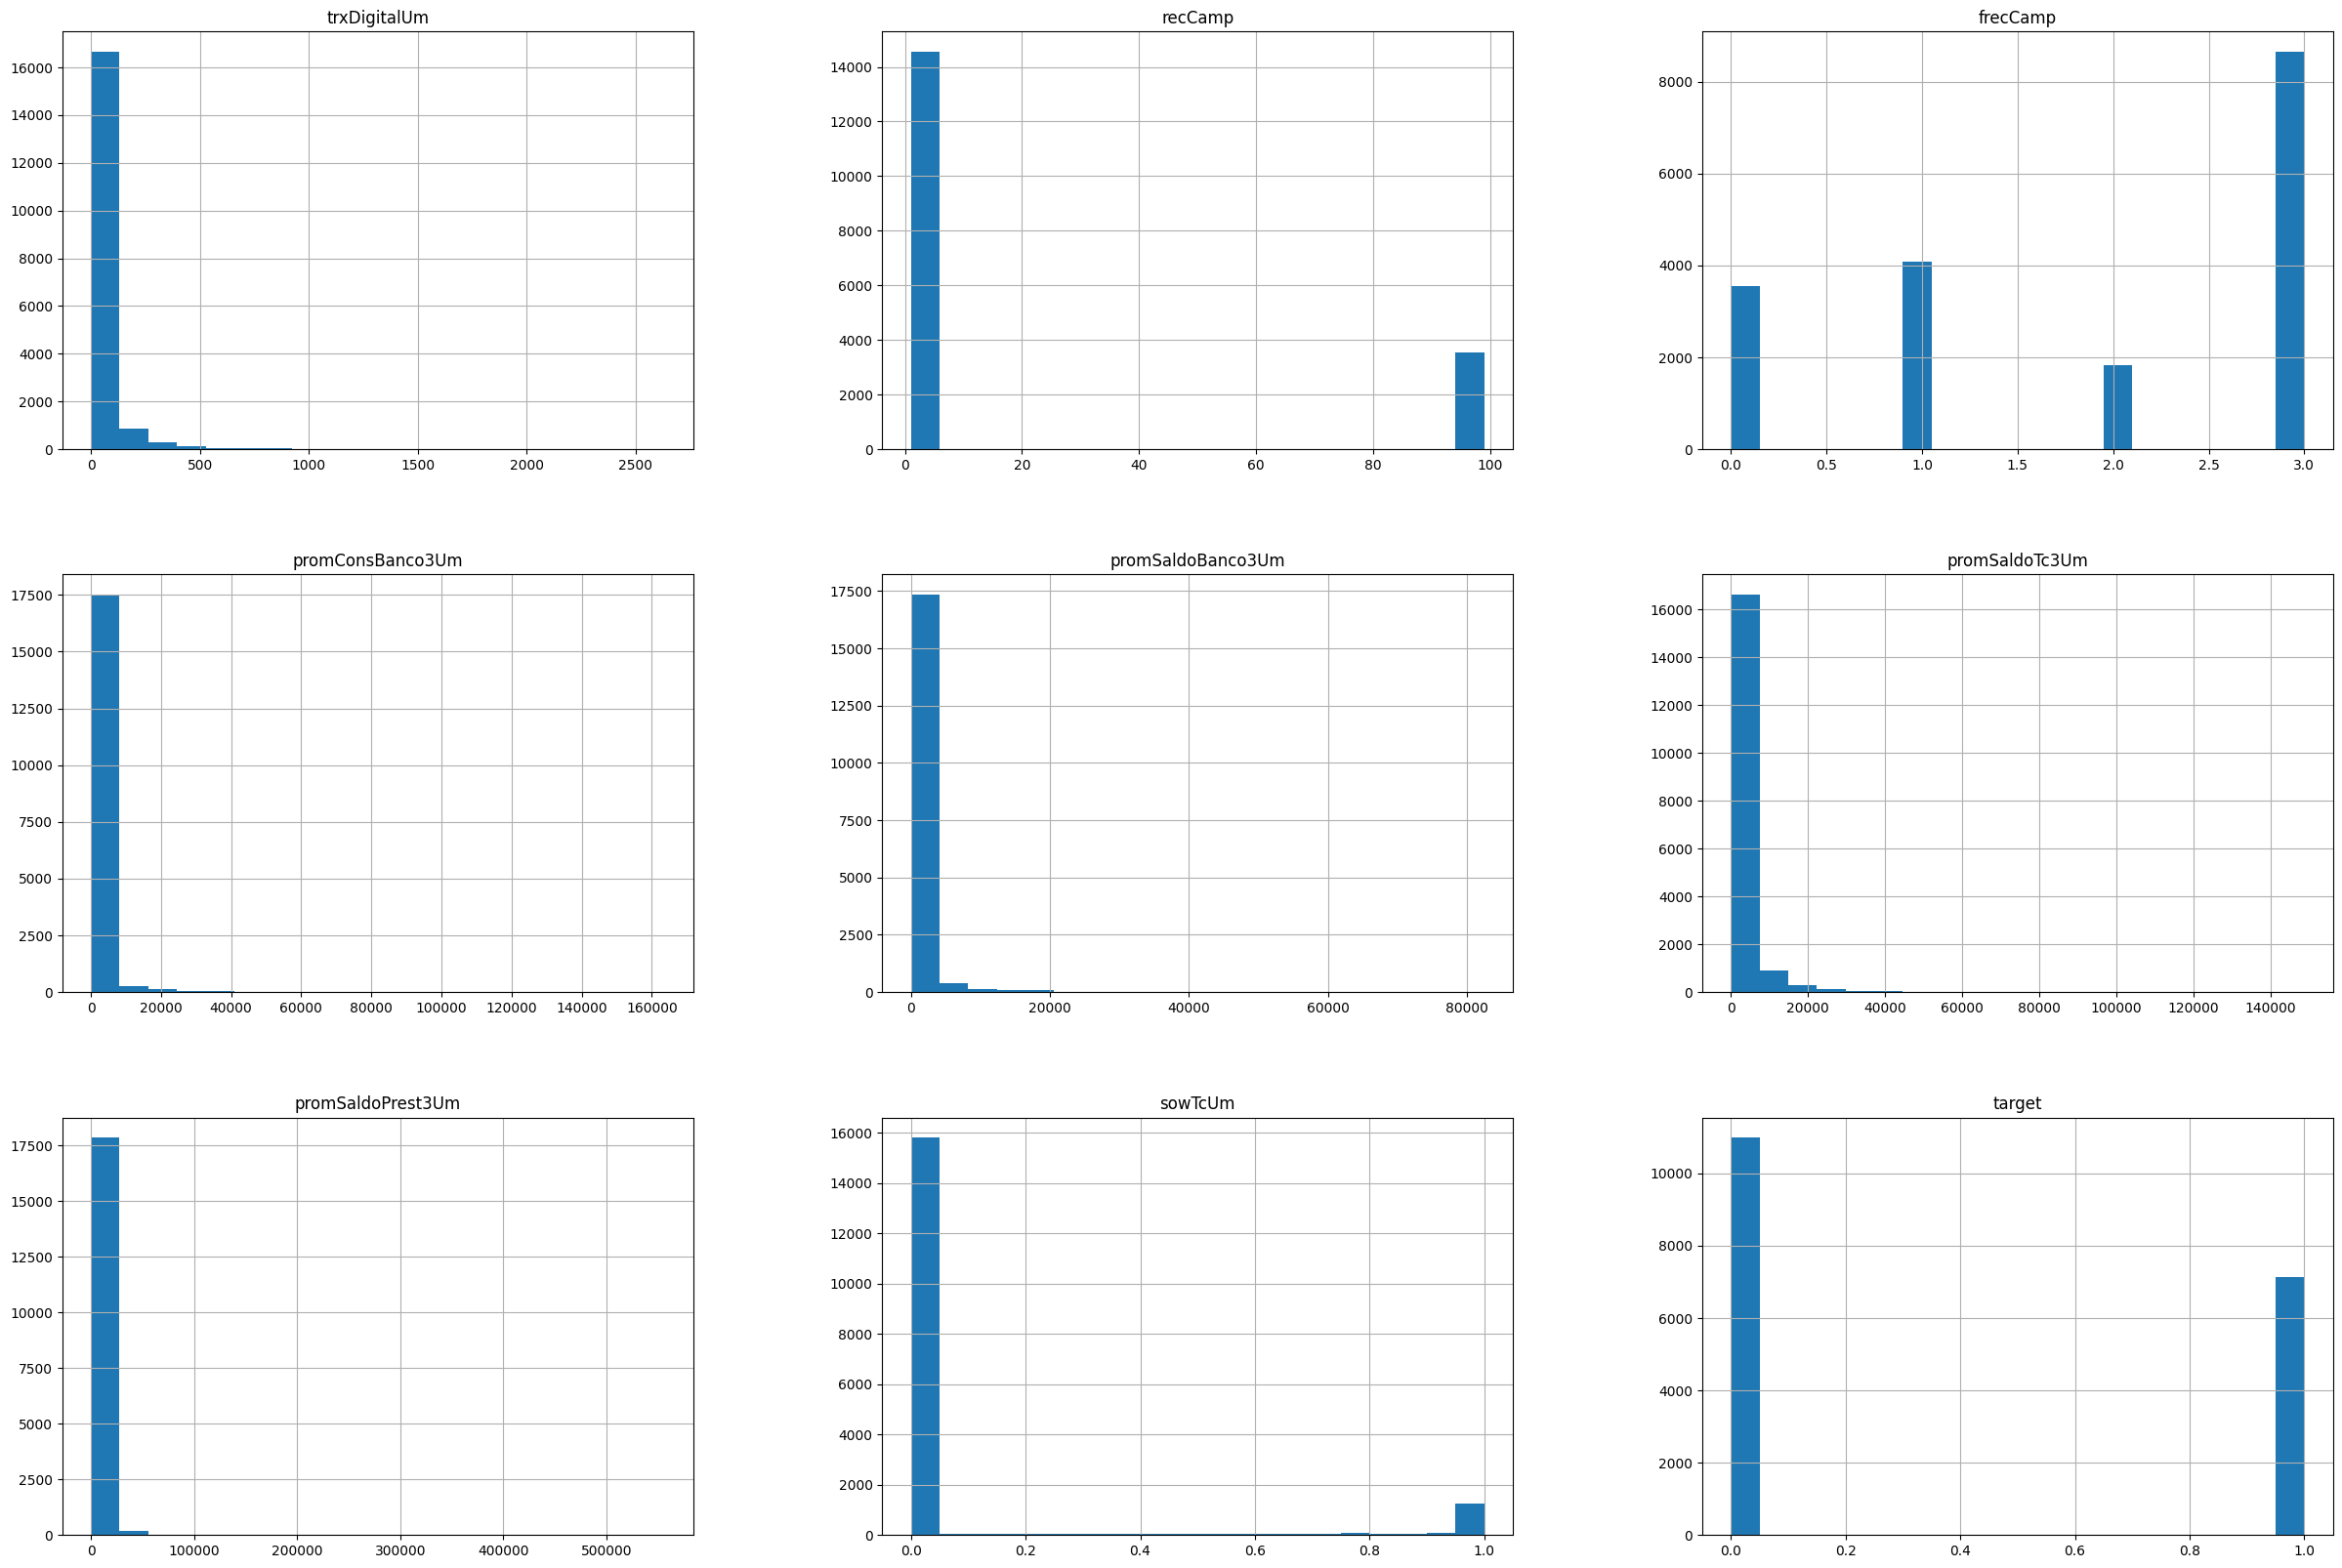

In [ ]:
# Generar histogramas
clientes_activos_limpios_ajustados.hist(bins=20, figsize=(30, 20))

<ipython-input-136-f3cc99d97f57>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = clientes_activos_limpios_ajustados.corr()  # Calculamos la matriz de correlación


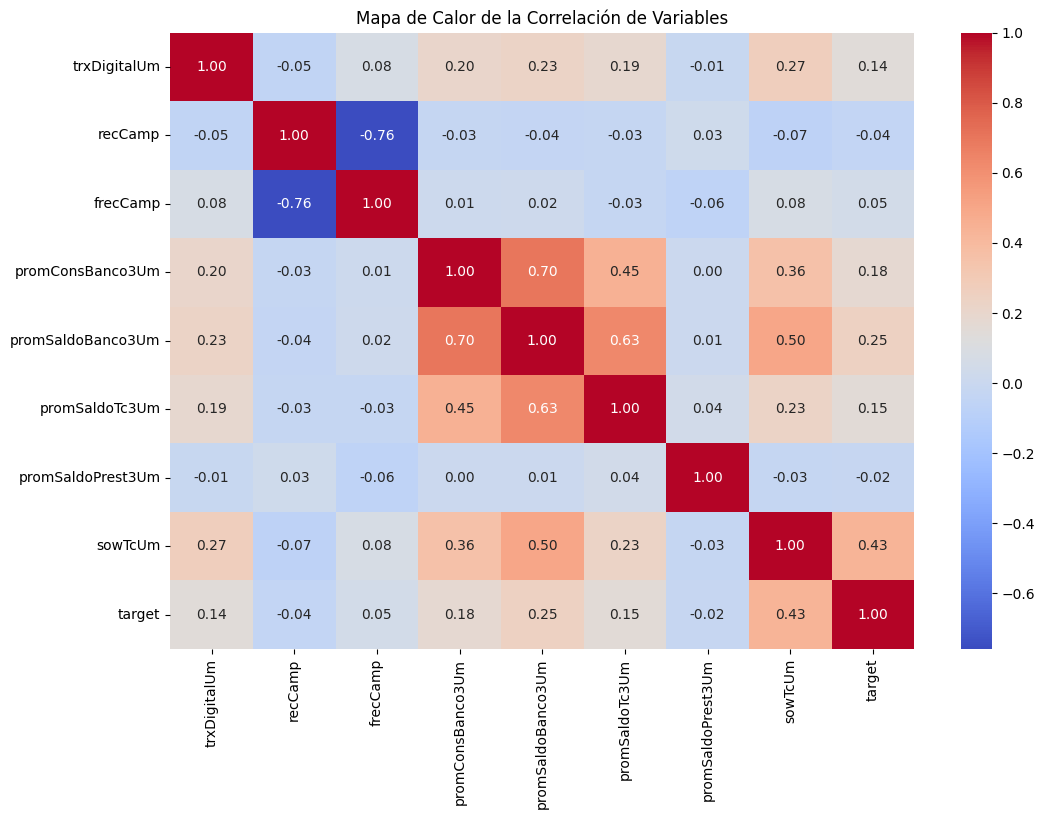

In [ ]:
# Mapa de calor
plt.figure(figsize=(12, 8))
corr = clientes_activos_limpios_ajustados.corr()  # Calculamos la matriz de correlación
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de la Correlación de Variables')  # Título del gráfico
plt.show()

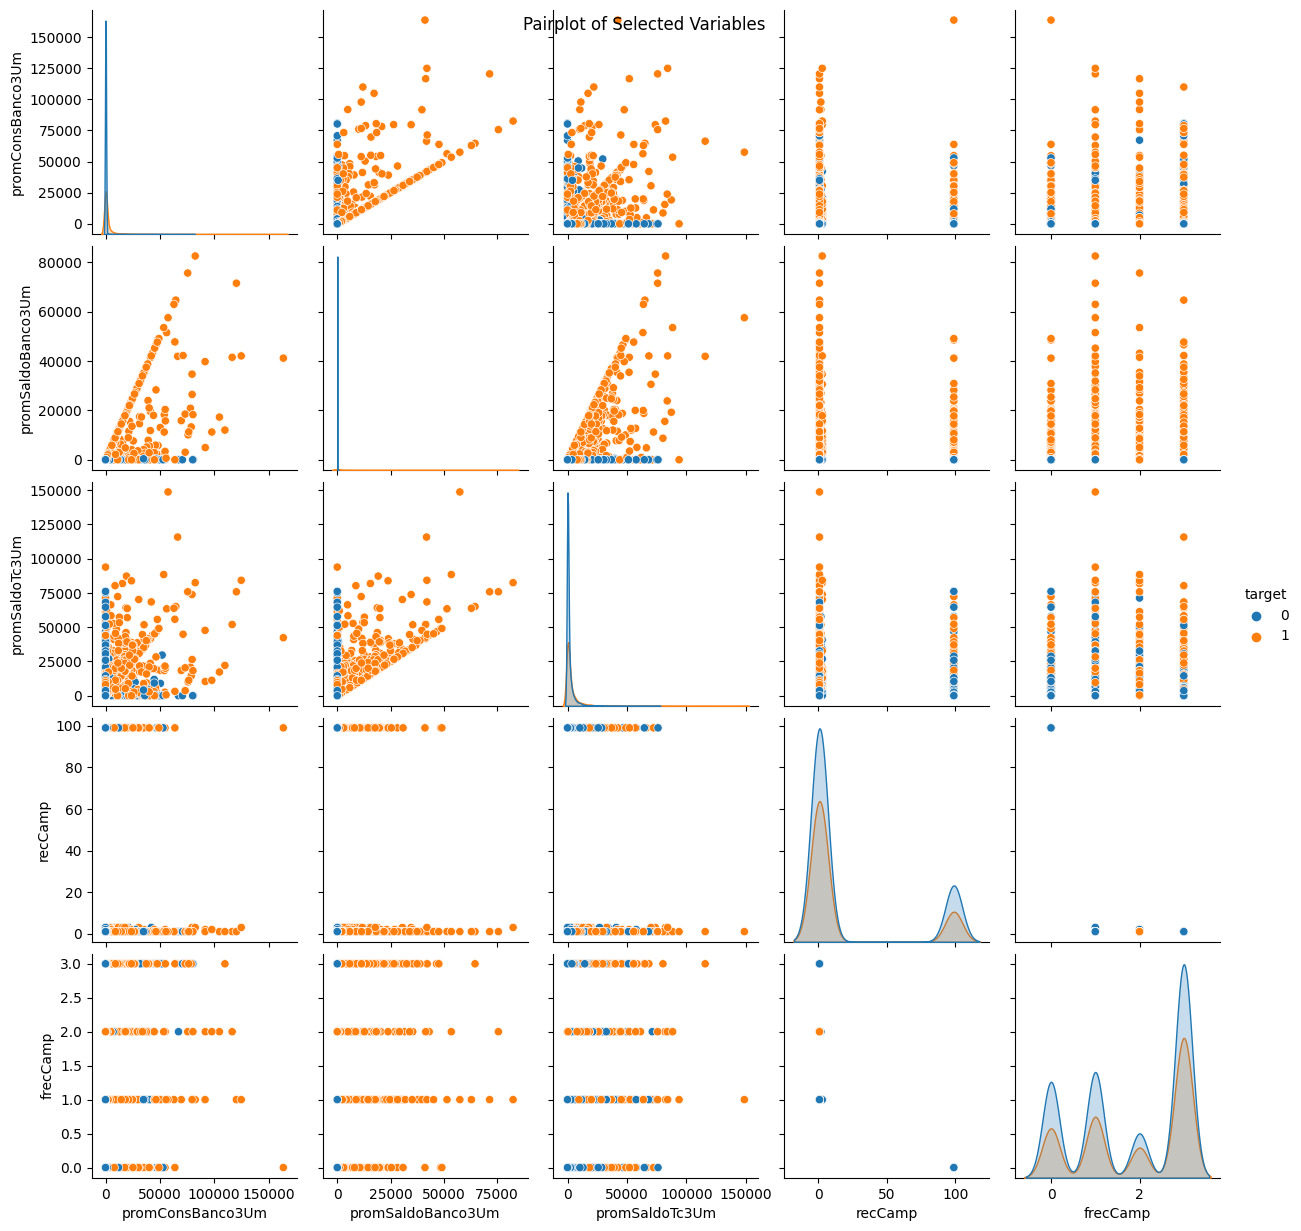

In [ ]:
# Gráficos de dispersión
sns.pairplot(clientes_activos_limpios_ajustados[[ 'promConsBanco3Um', 'promSaldoBanco3Um', 'promSaldoTc3Um','recCamp','target','frecCamp']], hue='target')
plt.suptitle('Pairplot of Selected Variables')
plt.show()

# Modelos

In [ ]:
# Carga de datos variable X, y
X = clientes_activos_limpios_ajustados
y = clientes_activos_limpios_ajustados.target

In [ ]:
# Dividr los datos
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
# Estadizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Feature Selection

In [ ]:
# Primer metodo: SelectKBest con F-test ANOVA
selector_kbest = SelectKBest(f_classif, k=10)
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)

In [ ]:
# Segundo metodo: SelectPercentile con F-test ANOVA
selector_percentile = SelectPercentile(f_classif, percentile=50)
X_train_percentile = selector_percentile.fit_transform(X_train, y_train)

In [ ]:
# Tercer metodo: VarianceThreshold
selector_variance = VarianceThreshold()
X_train_variance = selector_variance.fit_transform(X_train)

In [ ]:
# Comparar la cantidad de características seleccionadas por cada método
num_features_kbest = X_train_kbest.shape[1]
num_features_percentile = X_train_percentile.shape[1]
num_features_variance = X_train_variance.shape[1]

print(f"Número de características seleccionadas por SelectKBest: {num_features_kbest}")
print(f"Número de características seleccionadas por SelectPercentile: {num_features_percentile}")
print(f"Número de características seleccionadas por VarianceThreshold: {num_features_variance}")

Número de características seleccionadas por SelectKBest: 10
Número de características seleccionadas por SelectPercentile: 7
Número de características seleccionadas por VarianceThreshold: 14


# Entrenamiento de modelos

In [ ]:
# Métodos de seleccion de cateristicas
selectores = {
    'SelectKBest': SelectKBest(f_classif, k=10),
    'SelectPercentile': SelectPercentile(f_classif, percentile=50),
    'VarianceThreshold': VarianceThreshold()
}

In [ ]:
# Inicializar los modelos
modelos = {
    "Regresión Logística": LogisticRegression(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Bosque Aleatorio": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

In [ ]:
# DataFrame para almacenar métricas
df_metrica = pd.DataFrame(columns=["selector", 'modelo', "precision", "exactitud", "recall", "puntuacion_f1"])
df_metrica

,selector,modelo,precision,exactitud,recall,puntuacion_f1


In [ ]:
# Entrenamiento y evaluacion
for selector_name, selector in selectores.items():
  X_train_seleccionadas = selector.fit_transform(X_train, y_train)
  X_test_seleccionadas = selector.transform(X_test)

  for model_name, model in modelos.items():
    model.fit(X_train_seleccionadas, y_train)
    y_pred = model.predict(X_test_seleccionadas)

    # Calcular y guardar metricas
    metricas_actuales = pd.DataFrame({
        'selector': [selector_name],
        'modelo': [model_name],
        'precision': [accuracy_score(y_test, y_pred)],
        'exactitud': [precision_score(y_test, y_pred)],
        'recall': [recall_score(y_test, y_pred)],
        'puntuacion_f1': [f1_score(y_test, y_pred)]
    })

    df_metrica = pd.concat([df_metrica, metricas_actuales], ignore_index=True)

In [ ]:
df_metrica

,selector,modelo,precision,exactitud,recall,puntuacion_f1
0,SelectKBest,Regresión Logística,0.744481,0.959211,0.349305,0.512118
1,SelectKBest,SVM,0.740802,0.963115,0.337805,0.500177
2,SelectKBest,Naive Bayes,0.734180,0.863946,0.365117,0.513304
3,SelectKBest,Árbol de Decisión,0.677336,0.601710,0.471969,0.529001
4,SelectKBest,Bosque Aleatorio,0.692237,0.639676,0.454241,0.531241
5,SelectKBest,AdaBoost,0.747425,0.983740,0.347868,0.513982
6,SelectPercentile,Regresión Logística,0.744297,0.957950,0.349305,0.511938
7,SelectPercentile,SVM,0.741354,0.964529,0.338764,0.501418
8,SelectPercentile,Naive Bayes,0.734364,0.864926,0.365117,0.513477
9,SelectPercentile,Árbol de Decisión,0.677520,0.601954,0.472448,0.529396


In [ ]:
df_puntuacion_f1 = df_metrica.sort_values(by='puntuacion_f1', ascending=False)
df_puntuacion_f1

,selector,modelo,precision,exactitud,recall,puntuacion_f1
17,VarianceThreshold,AdaBoost,1.000000,1.000000,1.000000,1.000000
16,VarianceThreshold,Bosque Aleatorio,1.000000,1.000000,1.000000,1.000000
15,VarianceThreshold,Árbol de Decisión,1.000000,1.000000,1.000000,1.000000
14,VarianceThreshold,Naive Bayes,1.000000,1.000000,1.000000,1.000000
12,VarianceThreshold,Regresión Logística,1.000000,1.000000,1.000000,1.000000
13,VarianceThreshold,SVM,0.999080,0.998086,0.999521,0.998803
10,SelectPercentile,Bosque Aleatorio,0.691501,0.633812,0.465261,0.536612
4,SelectKBest,Bosque Aleatorio,0.692237,0.639676,0.454241,0.531241
9,SelectPercentile,Árbol de Decisión,0.677520,0.601954,0.472448,0.529396
3,SelectKBest,Árbol de Decisión,0.677336,0.601710,0.471969,0.529001


# Optimización de hiperparámetros

## Gridsearch

In [ ]:
# espacios de hiperparámetros para cada modelo
parametros = {
    "Regresión Logística": {'C': [0.1, 1, 10]},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "Naive Bayes": {},  # naive Bayes no tiene hiperparámetros para este caso
    "Árbol de Decisión": {'max_depth': [None, 10, 20]},
    "Bosque Aleatorio": {'n_estimators': [10, 100, 200], 'max_depth': [None, 10, 20]},
    "AdaBoost": {'n_estimators': [50, 100, 200]}
}

In [ ]:
# dataFrame para almacenar métricas
df_metrica = pd.DataFrame()

In [ ]:
# loop de optimización de hiperparámetros
for selector_name, selector in selectores.items():
    X_train_seleccionadas = selector.fit_transform(X_train, y_train)
    X_test_seleccionadas = selector.transform(X_test)

    for model_name, model in modelos.items():
        if model_name in parametros:
            # ejemplo con GridSearchCV
            grid_search = GridSearchCV(model, parametros[model_name], cv=5, scoring='accuracy')
            grid_search.fit(X_train_seleccionadas, y_train)

            # mejor modelo
            best_model = grid_search.best_estimator_
            y_pred = best_model.predict(X_test_seleccionadas)

            # calcular y guardar métricas
            metricas_actuales = pd.DataFrame({
                'selector': [selector_name],
                'modelo': [model_name],
                'mejores_parametros': [grid_search.best_params_],
                'precision': [accuracy_score(y_test, y_pred)],
                'exactitud': [precision_score(y_test, y_pred, average='binary')],
                'recall': [recall_score(y_test, y_pred, average='binary')],
                'puntuacion_f1': [f1_score(y_test, y_pred, average='binary')]
            })

            df_metrica = pd.concat([df_metrica, metricas_actuales], ignore_index=True)

In [ ]:
# ordenar por puntuacion_f1
df_puntuacion_f1 = df_metrica.sort_values(by='puntuacion_f1', ascending=False)
df_puntuacion_f1

,selector,modelo,mejores_parametros,precision,exactitud,recall,puntuacion_f1
17,VarianceThreshold,AdaBoost,{'n_estimators': 50},1.000000,1.000000,1.000000,1.000000
15,VarianceThreshold,Árbol de Decisión,{'max_depth': None},1.000000,1.000000,1.000000,1.000000
16,VarianceThreshold,Bosque Aleatorio,"{'max_depth': None, 'n_estimators': 100}",1.000000,1.000000,1.000000,1.000000
12,VarianceThreshold,Regresión Logística,{'C': 0.1},1.000000,1.000000,1.000000,1.000000
13,VarianceThreshold,SVM,"{'C': 0.1, 'kernel': 'linear'}",1.000000,1.000000,1.000000,1.000000
14,VarianceThreshold,Naive Bayes,{},1.000000,1.000000,1.000000,1.000000
5,SelectKBest,AdaBoost,{'n_estimators': 50},0.747425,0.983740,0.347868,0.513982
11,SelectPercentile,AdaBoost,{'n_estimators': 50},0.747425,0.985054,0.347389,0.513638
8,SelectPercentile,Naive Bayes,{},0.734364,0.864926,0.365117,0.513477
7,SelectPercentile,SVM,"{'C': 1, 'kernel': 'linear'}",0.746505,0.975839,0.348347,0.513418


## RandomSearch

In [ ]:
# Loop de optimización de hiperparámetros
for selector_name, selector in selectores.items():
    X_train_seleccionadas = selector.fit_transform(X_train, y_train)
    X_test_seleccionadas = selector.transform(X_test)

    for model_name, model in modelos.items():
        if model_name in parametros:
            # Calcula el número de combinaciones posibles
            num_combinaciones = 1
            for param in parametros[model_name].values():
                num_combinaciones *= len(param)
            n_iter = min(10, num_combinaciones)

            # RandomizedSearchCV
            random_search = RandomizedSearchCV(model, parametros[model_name], n_iter=n_iter, cv=5, scoring='accuracy', random_state=42)
            random_search.fit(X_train_seleccionadas, y_train)

            # Mejor modelo
            best_model = random_search.best_estimator_
            y_pred = best_model.predict(X_test_seleccionadas)

            # Calcular y guardar métricas
            metricas_actuales = pd.DataFrame({
                'selector': [selector_name],
                'modelo': [model_name],
                'mejores_parametros': [random_search.best_params_],
                'precision': [accuracy_score(y_test, y_pred)],
                'exactitud': [precision_score(y_test, y_pred, average='binary')],
                'recall': [recall_score(y_test, y_pred, average='binary')],
                'puntuacion_f1': [f1_score(y_test, y_pred, average='binary')]
            })

            df_metrica = pd.concat([df_metrica, metricas_actuales], ignore_index=True)

In [ ]:
# ordenar por puntuacion_f1
df_puntuacion_f1 = df_metrica.sort_values(by='puntuacion_f1', ascending=False)
df_puntuacion_f1.head(10)

,selector,modelo,mejores_parametros,precision,exactitud,recall,puntuacion_f1
35,VarianceThreshold,AdaBoost,{'n_estimators': 50},1.0,1.0,1.0,1.0
12,VarianceThreshold,Regresión Logística,{'C': 0.1},1.0,1.0,1.0,1.0
31,VarianceThreshold,SVM,"{'kernel': 'linear', 'C': 0.1}",1.0,1.0,1.0,1.0
32,VarianceThreshold,Naive Bayes,{},1.0,1.0,1.0,1.0
17,VarianceThreshold,AdaBoost,{'n_estimators': 50},1.0,1.0,1.0,1.0
16,VarianceThreshold,Bosque Aleatorio,"{'max_depth': None, 'n_estimators': 100}",1.0,1.0,1.0,1.0
30,VarianceThreshold,Regresión Logística,{'C': 0.1},1.0,1.0,1.0,1.0
14,VarianceThreshold,Naive Bayes,{},1.0,1.0,1.0,1.0
13,VarianceThreshold,SVM,"{'C': 0.1, 'kernel': 'linear'}",1.0,1.0,1.0,1.0
15,VarianceThreshold,Árbol de Decisión,{'max_depth': None},1.0,1.0,1.0,1.0


In [ ]:
# eleccion del mejor modelo
mejor_modelo = df_metrica.loc[df_metrica['puntuacion_f1'].idxmax()]
mejor_modelo

selector                VarianceThreshold
modelo                Regresión Logística
mejores_parametros             {'C': 0.1}
precision                             1.0
exactitud                             1.0
recall                                1.0
puntuacion_f1                         1.0
Name: 12, dtype: object

# Conclusiones



1.   En base a los resultados la estadística básica extraida del data set en el EDA hemos podido identificar columnas que no aportan valor relevante para determinar un modelo ajustado a la realidad
2.   Para ayudarnos en la selección de variables y evitar la multicolinealidad fue importante definir umbrales
3.   De la interpretación de los gráficos de visualización Histogramas, Gráfico de disperción y mapa de calor concluimos que las variables influyentes son: cantidad de transacciones digitales en el último mes, recepción de campañas, frecuencia de recepción de campañas, promedio del consumo en el banco en los últimos tres meses, promedio de saldo en el banco en los últimos 3 meses, promedio del saldo en tarjetas de crédito en los últimos tres meses, promedio de saldo de préstamos en los últimos tres meses, indicador relacionado con tarjetas de crédito en el último mes
4.   Luego de la evaluación y entrenamiento de modelos basándonos en la puntuación F1 (necesaria para el caso banco) consideramos que los modelos adecuados para predecir que clientes pueden tener un préstamo aprobado son: AdaBoost, Bósque aleatorio, árbol de desición, naive bayes y regresión logística de acuerdo al selector VarianceThreshold
5. Finalmente luego de pasar por el proceso de optimización de hiperparámetros llegamos a la conclusión que el mejor de los mejores modelos es: el modelo de Regresión Logística de acuerdo al selector VarianceThreshold

